# Pymaceuticals Inc.
---

### Analysis

- The bar graph showed the Drug Regimen Capomulin has the maximum mice number, and Propriva has the smaller mice number. After removing duplicates the total number of mice is 248. The total count of mice by gender is 124 female mice and 125 male mice. The Capomulin and Ramicane treatments reduces the size of tumors better.The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases. 
Thlinear e regressi assist in o understaingnd how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared valuofis 70assisted in % the model f e data,hich isly good to predict the data from the modelThe h Higher R-squared valu, the t smaller differences between the observed data, and the fitted value. 7 of thehe model explaedns all of the variation in the response variable around its me.r
 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import pandas as pd
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [55]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
mouse_count

249

In [57]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_dup = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_dup

array(['g989'], dtype=object)

In [59]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_dup_ID = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
mouse_dup_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data[combined_data["Mouse ID"].isin(mouse_dup)==False]
clean_combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [63]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_combined_data_df["Mouse ID"].nunique()
mouse_count2

248

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_combined_data_df['Tumor Volume (mm3)'].groupby(clean_combined_data_df['Drug Regimen']).mean()
median = clean_combined_data_df['Tumor Volume (mm3)'].groupby(clean_combined_data_df['Drug Regimen']).median()
var = clean_combined_data_df['Tumor Volume (mm3)'].groupby(clean_combined_data_df['Drug Regimen']).var()
std = clean_combined_data_df['Tumor Volume (mm3)'].groupby(clean_combined_data_df['Drug Regimen']).std()
sem = clean_combined_data_df['Tumor Volume (mm3)'].groupby(clean_combined_data_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_combined_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

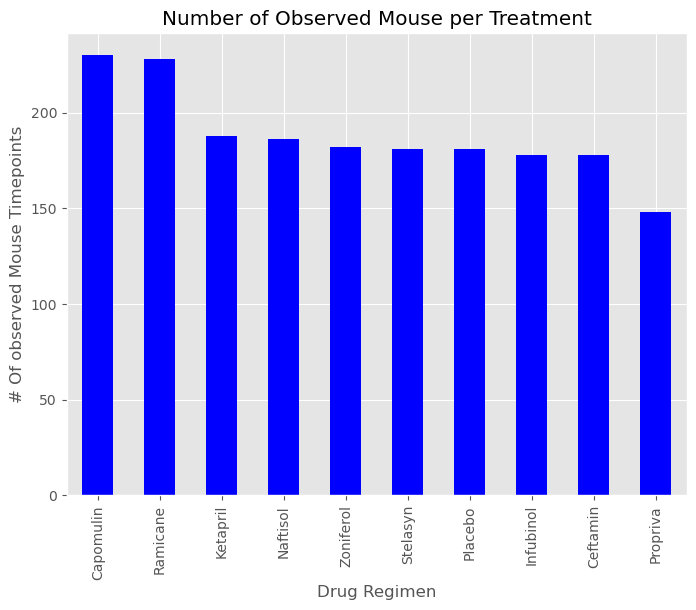

<Figure size 640x480 with 0 Axes>

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_countdata = clean_combined_data_df["Drug Regimen"].value_counts()
mouse_countdata.plot(kind='bar', color='b', figsize=(8,6)) 
plt.xlabel("Drug Regimen")
plt.ylabel("# Of observed Mouse Timepoints")
plt.title("Number of Observed Mouse per Treatment")
plt.show()
plt.tight_layout()

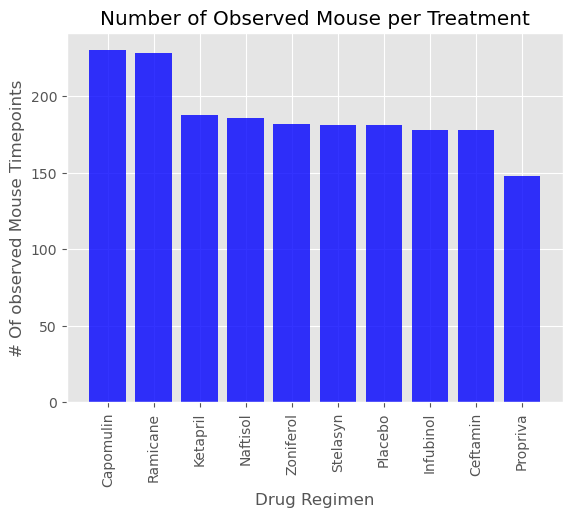

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_countdata.index.values
y_axis = mouse_countdata.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel
plt.title("Number of Observed Mouse per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

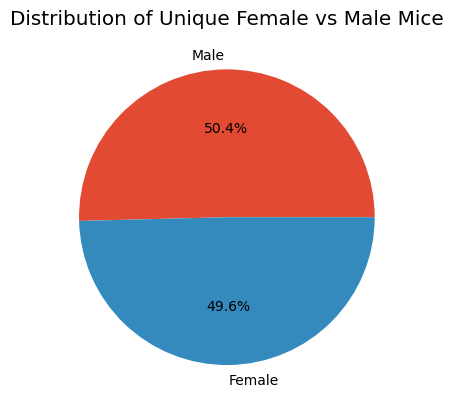

In [75]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_gender = clean_combined_data_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
mice_gender_counts = mice_gender['Sex'].value_counts()  # Count the occurrences of each gender

# Generate the pie chart
mice_gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Optionally remove the y-label for better aesthetics
plt.title('Distribution of Unique Female vs Male Mice')  
plt.show()

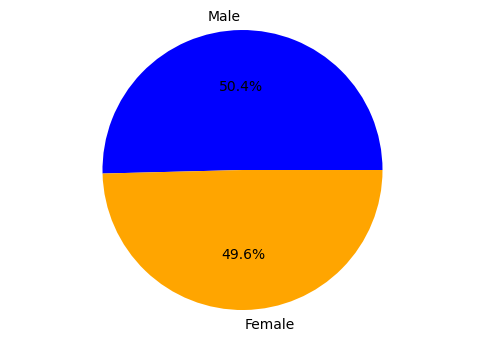

In [77]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_combined_data_df[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
labels = gender_counts.index
sizes = gender_counts.values
colors = ['blue', 'orange']
#explode = (0.1, 0)  # explode the 1st slice (Female)

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_combined_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
fin_tumor_vol = pd.merge(last_timepoint, clean_combined_data_df, on=['Mouse ID', 'Timepoint'], how='left')
fin_tumor_vol = fin_tumor_vol[fin_tumor_vol['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and determine potential outliers: Use a for loop to iterate through each treatment group and calculate the IQR and outliers:
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = fin_tumor_vol.loc[fin_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor_vol_data list
    tumor_vol_data.append(tumor_volumes)
    
   # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


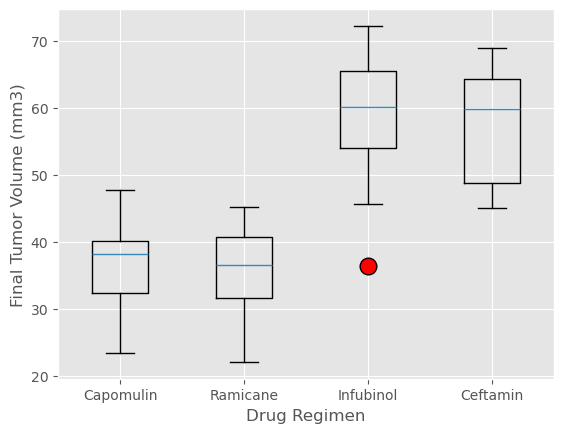

In [84]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_outliers = dict(markerfacecolor='red', markersize=12)

# Create a box plot of the tumor volume data, with the outliers styled as per red_outliers
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=red_outliers)

#set y axis
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

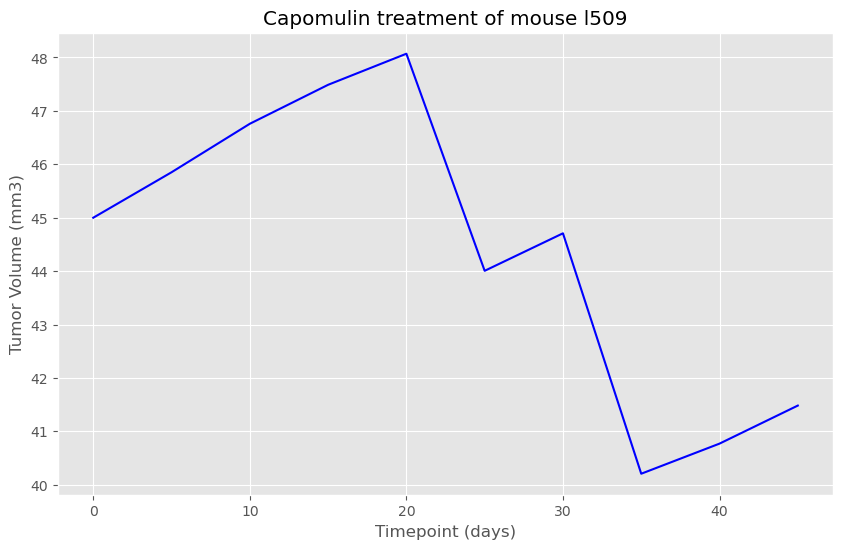

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the DataFrame for a specific mouse ID
mouse_id = 'l509'  # Example mouse ID
mouse_data = clean_combined_data_df[clean_combined_data_df['Mouse ID'] == mouse_id]

# Extract time points and tumor volume
time_points = mouse_data['Timepoint']
tumor_volume = mouse_data['Tumor Volume (mm3)']

# Create the line 
plt.figure(figsize=(10, 6))
plt.plot(time_points, tumor_volume, markersize=12, color='b')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

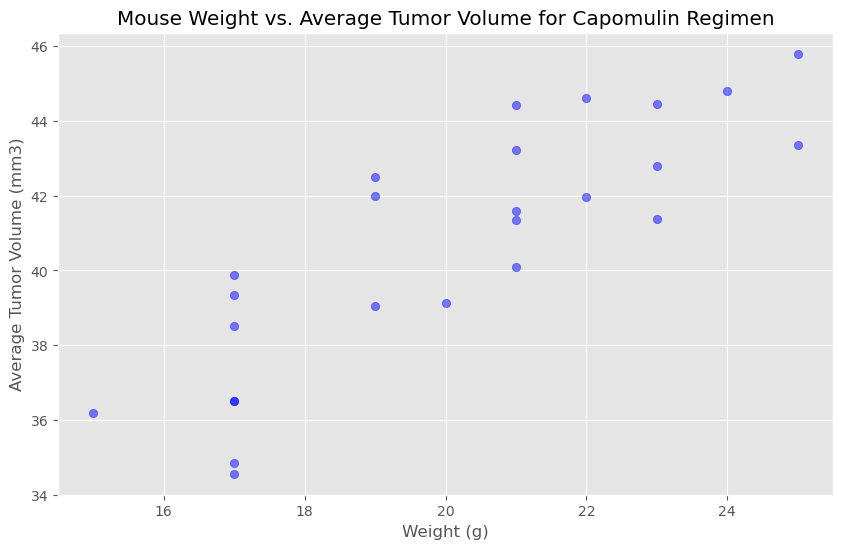

In [89]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_combined_data_df[clean_combined_data_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, color='blue', alpha=0.5)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


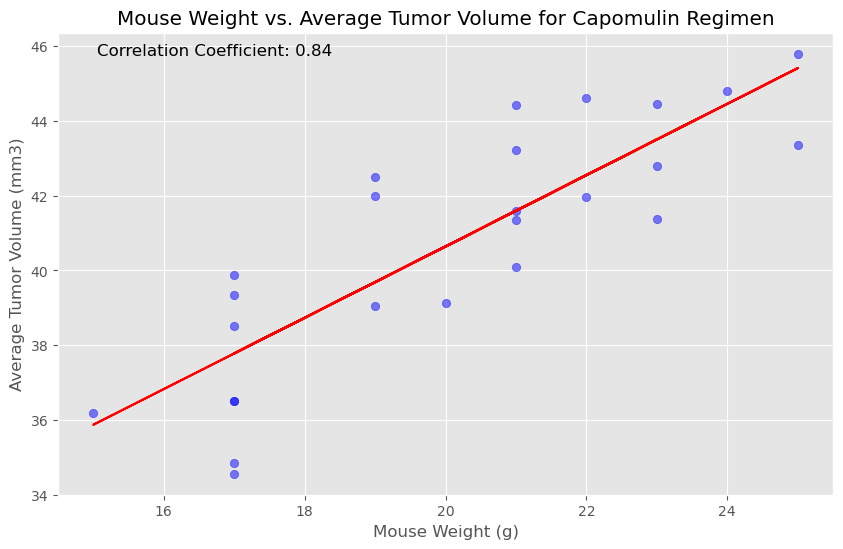

In [92]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_combined_data_df[clean_combined_data_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and mouse weight
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Prepare data for correlation and regression
x_values = mouse_weights
y_values = avg_tumor_volume

# Calculate the correlation coefficient
correlation_coefficient = stats.pearsonr(x_values, y_values)[0]
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.5, label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Annotate the correlation coefficient on the plot
plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.2f}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction', 
             fontsize=12, 
             color='black')
plt.show()